In [1]:
# for automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
from birdbrain.atlas import atlas
import numpy as np

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [17]:
from birdbrain.utils import um_to_vox, vox_to_um

In [4]:
from birdbrain.visualization.plotting_2d import plot_2d_coordinates

In [45]:
dset_dir = '../../data/processed/mustached_bat/'

mustached_bat_atlas = atlas(
    species = 'mustached_bat',
    dset_dir = dset_dir,
    um_mult = 1000,
    smoothing = []#['Brain', 'Brainregions']
)

Data already download
Getting voxel data from .img files...
Getting location for each nucleus/region from voxel data...


Atlas created


In [46]:
mustached_bat_atlas.brain_labels[:3]

,label,region,type_
region,,,
Exterior,1,Exterior,Mustached_bat_delineations
Inferior.Colliculus_IC,2,Inferior.Colliculus_IC,Mustached_bat_delineations
Commissure.of.Inferior.Colliculus_cic,3,Commissure.of.Inferior.Colliculus_cic,Mustached_bat_delineations


In [47]:
# initial location of y sinus
ysin_in_um = [0,0,0]
# get the voxel location 
y_sin_in_vox = um_to_vox(ysin_in_um, mustached_bat_atlas.voxel_data.loc['Brain','affine'], mustached_bat_atlas.um_mult, mustached_bat_atlas.y_sinus_um_transform)
print(y_sin_in_vox)

[ 95 167  56]


In [48]:
vox_to_um(ysin_in_um, mustached_bat_atlas.voxel_data.loc['Brain','affine'], mustached_bat_atlas.um_mult, mustached_bat_atlas.y_sinus_um_transform)


array([-5964.2701149 , -9800.00019073, -4699.99980927])

In [49]:
mustached_bat_atlas.voxel_data.index

Index(['Mustached_bat_delineations', 'Brain', 'Md', 'Skull_ct', 'Ad', 'Fa',
       'Col_fa', 'Tdi_dti_color', 'Rd', 'T2w_3d_rare', 'B0', 'Tdi_dti_grey'],
      dtype='object')

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}


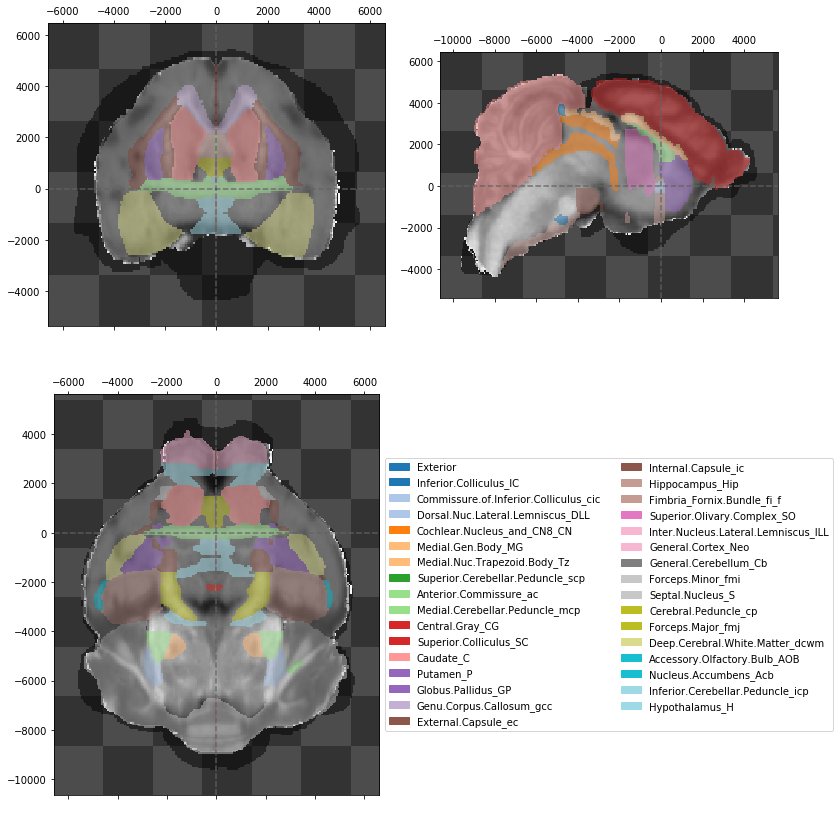

In [53]:
plot_2d_coordinates(mustached_bat_atlas, point_in_um= [0,0,0], regions_to_plot=['Mustached_bat_delineations'], brain_masked_image='Rd', region_alpha = 0.5);